In [1]:
!screenfetch

                          ./+o+-       ivb@ivb-X399-AORUS-XTREME
                  yyyyy- -yyyyyy+      OS: Ubuntu 18.04 bionic
               ://+//////-yyyyyyo      Kernel: x86_64 Linux 4.15.0-101-generic
           .++ .:/++++++/-.+sss/`      Uptime: 12d 10h 10m
         .:++o:  /++++++++/:--:/-      Packages: 2407
        o:+o+:++.`..```.-/oo+++++/     Shell: sh
       .:+o:+o/.          `+sssoo+/    Resolution: 1680x1050
  .++/+:+oo+o:`             /sssooo.   DE: GNOME 
 /+++//+:`oo+o               /::--:.   WM: GNOME Shell
 \+/+o+++`o++o               ++////.   WM Theme: Adwaita
  .++.o+++oo+:`             /dddhhh.   GTK Theme: Ambiance [GTK2/3]
       .+.o+oo:.          `oddhhhh+    Icon Theme: ubuntu-mono-dark
        \+.++o+o``-````.:ohdhhhhh+     Font: Ubuntu 11
         `:o+++ `ohhhhhhhhyo++os:      CPU: AMD Ryzen Threadripper 1900X 8-Core @ 16x 3.8GHz [44.7°C]
           .o:`.syhhhhhhh/.oo++o`      GPU: GeForce GTX 1080 Ti
               /osyyyyyyo++ooo+++/     RAM: 24338Mi

In [2]:
RuBERT_PATH = '/home/ivb/Repos/ner_medical/.deeppavlov/downloads/bert_models/rubert_cased_L-12_H-768_A-12_v1'
RuBERT_TF_PATH = RuBERT_PATH + '/bert_model.ckpt'
RuBERT_PT_PATH = RuBERT_PATH + '/bert_model.pth'
RuBERT_CONFIG = RuBERT_PATH + '/bert_config.json'
RuBERT_VOCAB_PATH = RuBERT_PATH + '/vocab.txt'

mlRuBERT_PATH = '/home/ivb/Repos/ner_medical/.deeppavlov/models/ml_rus_bert/mlrubert_cased_L-12_H-768_A-12_v1'
mlRuBERT_TF_PATH = mlRuBERT_PATH + '/bert_model.ckpt'
mlRuBERT_PT_PATH = mlRuBERT_PATH + '/bert_model.pth'

FILELIST_PATH = '/home/ivb/Repos/ner_medical/data/clinical/filelists/lm_filelist.txt'

In [3]:
!python ../scripts/convert_bert_original_tf_checkpoint_to_pytorch.py \
    --tf $RuBERT_TF_PATH \
    --bert_config_file $RuBERT_CONFIG \
    --pytorch_dump_path $RuBERT_PT_PATH

Building PyTorch model from configuration: BertConfig {
  "attention_probs_dropout_prob": 0.1,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "type_vocab_size": 2,
  "vocab_size": 119547
}

INFO:transformers.modeling_bert:Converting TensorFlow checkpoint from /home/ivb/Repos/ner_medical/.deeppavlov/downloads/bert_models/rubert_cased_L-12_H-768_A-12_v1/bert_model.ckpt
INFO:transformers.modeling_bert:Loading TF weight bert/embeddings/LayerNorm/beta with shape [768]
INFO:transformers.modeling_bert:Loading TF weight bert/embeddings/LayerNorm/gamma with sha

INFO:transformers.modeling_bert:Loading TF weight bert/encoder/layer_11/output/LayerNorm/gamma with shape [768]
INFO:transformers.modeling_bert:Loading TF weight bert/encoder/layer_11/output/dense/bias with shape [768]
INFO:transformers.modeling_bert:Loading TF weight bert/encoder/layer_11/output/dense/kernel with shape [3072, 768]
INFO:transformers.modeling_bert:Loading TF weight bert/encoder/layer_2/attention/output/LayerNorm/beta with shape [768]
INFO:transformers.modeling_bert:Loading TF weight bert/encoder/layer_2/attention/output/LayerNorm/gamma with shape [768]
INFO:transformers.modeling_bert:Loading TF weight bert/encoder/layer_2/attention/output/dense/bias with shape [768]
INFO:transformers.modeling_bert:Loading TF weight bert/encoder/layer_2/attention/output/dense/kernel with shape [768, 768]
INFO:transformers.modeling_bert:Loading TF weight bert/encoder/layer_2/attention/self/key/bias with shape [768]
INFO:transformers.modeling_bert:Loading TF weight bert/encoder/layer_2/att

INFO:transformers.modeling_bert:Loading TF weight bert/encoder/layer_6/output/LayerNorm/beta with shape [768]
INFO:transformers.modeling_bert:Loading TF weight bert/encoder/layer_6/output/LayerNorm/gamma with shape [768]
INFO:transformers.modeling_bert:Loading TF weight bert/encoder/layer_6/output/dense/bias with shape [768]
INFO:transformers.modeling_bert:Loading TF weight bert/encoder/layer_6/output/dense/kernel with shape [3072, 768]
INFO:transformers.modeling_bert:Loading TF weight bert/encoder/layer_7/attention/output/LayerNorm/beta with shape [768]
INFO:transformers.modeling_bert:Loading TF weight bert/encoder/layer_7/attention/output/LayerNorm/gamma with shape [768]
INFO:transformers.modeling_bert:Loading TF weight bert/encoder/layer_7/attention/output/dense/bias with shape [768]
INFO:transformers.modeling_bert:Loading TF weight bert/encoder/layer_7/attention/output/dense/kernel with shape [768, 768]
INFO:transformers.modeling_bert:Loading TF weight bert/encoder/layer_7/attentio

In [2]:
import torch
from torch.utils.data import Dataset

from transformers import BertForMaskedLM
from transformers import Trainer, TrainingArguments
from transformers import DataCollatorForLanguageModeling

from bert_dp.tokenization import FullTokenizer

from models.preprocessors.sent_tokenizer import RuSentTokenizer
from deeppavlov.models.preprocessors.bert_preprocessor import BertPreprocessor

from transformers.tokenization_bert import BertTokenizer
from transformers import AutoTokenizer

[nltk_data] Downloading package punkt to /home/ivb/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ivb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package perluniprops to /home/ivb/nltk_data...
[nltk_data]   Package perluniprops is already up-to-date!
[nltk_data] Downloading package nonbreaking_prefixes to
[nltk_data]     /home/ivb/nltk_data...
[nltk_data]   Package nonbreaking_prefixes is already up-to-date!


In [3]:
class MedicineLightDataset(Dataset):
    
    def __init__(self, filelist_path, tokenizer, max_lenght):
        sent_tokenizer = RuSentTokenizer()
        
        with open(filelist_path, 'r') as f:
            paths = [line.strip() for line in f.readlines()]

        batch_text = []
        for path in paths:
            with open(path, 'r') as f:
                txt = f.read()
            batch_text.append(txt)

        batch_sents = sent_tokenizer(batch_text)
        self.batch_sent = [tokenizer.encode(sent, max_lenght=max_lenght) 
                           for sents in batch_sents for sent in sents]
        self.batch_sent = [sent for sent in self.batch_sent if len(sent) < max_lenght]

    def __len__(self):
        return len(self.batch_sent)

    def __getitem__(self, idx):
        return torch.tensor(self.batch_sent[idx])

In [4]:
tokenizer = BertTokenizer(RuBERT_VOCAB_PATH, do_lower_case=False)

In [5]:
dataset = MedicineLightDataset(FILELIST_PATH, tokenizer, max_lenght=128)

In [6]:
model = BertForMaskedLM.from_pretrained(RuBERT_PT_PATH, config=RuBERT_CONFIG).cuda()

In [7]:
model

BertForMaskedLM(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=T

In [8]:
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=True, mlm_probability=0.15
)

In [9]:
for p in model.parameters():
    p.requires_grad_(False)
for p in model.cls.parameters():
    p.requires_grad_(True)

for layer in range(9, 12):
    for p in model.bert.encoder.layer[layer].parameters():
        p.requires_grad_(True)
    
training_args = TrainingArguments(
    output_dir=mlRuBERT_PATH,
    overwrite_output_dir=True,
    do_train=True,
    per_device_train_batch_size=16,
    num_train_epochs=1,
    logging_dir=mlRuBERT_PATH + '/logs_cls',
    logging_steps=100,
    save_steps=100,
    save_total_limit=2,
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=dataset,
    prediction_loss_only=True,
)

trainer.train()

{"loss": 3.0508713698387147, "learning_rate": 4.328859060402685e-05, "epoch": 0.1342281879194631, "step": 100}
{"loss": 2.4473055493831635, "learning_rate": 3.6577181208053695e-05, "epoch": 0.2684563758389262, "step": 200}
{"loss": 2.3219171273708343, "learning_rate": 2.986577181208054e-05, "epoch": 0.40268456375838924, "step": 300}
{"loss": 2.1306995111703873, "learning_rate": 2.3154362416107384e-05, "epoch": 0.5369127516778524, "step": 400}
{"loss": 2.050974677801132, "learning_rate": 1.644295302013423e-05, "epoch": 0.6711409395973155, "step": 500}
{"loss": 1.903460049033165, "learning_rate": 9.731543624161075e-06, "epoch": 0.8053691275167785, "step": 600}
{"loss": 1.8976793998479844, "learning_rate": 3.02013422818792e-06, "epoch": 0.9395973154362416, "step": 700}




TrainOutput(global_step=745, training_loss=2.2339188512539705)

In [10]:
trainer.save_model(mlRuBERT_PATH + '/bert_model_1e')

In [6]:
!python ../scripts/convert_bert_pytorch_checkpoint_to_original_tf.py \
    --model_name $RuBERT_CONFIG \
    --pytorch_model_path $mlRuBERT_PATH/bert_model_1e/pytorch_model.bin \
    --tf_cache_dir $mlRuBERT_PATH/bert_model_1e_ckpt



2020-06-10 22:54:11.321697: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-06-10 22:54:11.321862: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-06-10 22:54:11.322489: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: GeForce GTX 1080 Ti major: 6 minor: 1 memoryClockRate(GHz): 1.582
pciBusID: 0000:41:00.0
2020-06-10 22:54:11.322515: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0
2020-06-10 22:54:11.322535: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
2020-06-10 22:54:11.322551: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libc

Successfully created bert/encoder/layer_0/intermediate/dense/kernel: True
Successfully created bert/encoder/layer_0/intermediate/dense/bias: True
Successfully created bert/encoder/layer_0/output/dense/kernel: True
Successfully created bert/encoder/layer_0/output/dense/bias: True
Successfully created bert/encoder/layer_0/output/LayerNorm/gamma: True
Successfully created bert/encoder/layer_0/output/LayerNorm/beta: True
Successfully created bert/encoder/layer_1/attention/self/query/kernel: True
Successfully created bert/encoder/layer_1/attention/self/query/bias: True
Successfully created bert/encoder/layer_1/attention/self/key/kernel: True
Successfully created bert/encoder/layer_1/attention/self/key/bias: True
Successfully created bert/encoder/layer_1/attention/self/value/kernel: True
Successfully created bert/encoder/layer_1/attention/self/value/bias: True
Successfully created bert/encoder/layer_1/attention/output/dense/kernel: True
Successfully created bert/encoder/layer_1/attention/out

Successfully created bert/encoder/layer_7/attention/output/LayerNorm/beta: True
Successfully created bert/encoder/layer_7/intermediate/dense/kernel: True
Successfully created bert/encoder/layer_7/intermediate/dense/bias: True
Successfully created bert/encoder/layer_7/output/dense/kernel: True
Successfully created bert/encoder/layer_7/output/dense/bias: True
Successfully created bert/encoder/layer_7/output/LayerNorm/gamma: True
Successfully created bert/encoder/layer_7/output/LayerNorm/beta: True
Successfully created bert/encoder/layer_8/attention/self/query/kernel: True
Successfully created bert/encoder/layer_8/attention/self/query/bias: True
Successfully created bert/encoder/layer_8/attention/self/key/kernel: True
Successfully created bert/encoder/layer_8/attention/self/key/bias: True
Successfully created bert/encoder/layer_8/attention/self/value/kernel: True
Successfully created bert/encoder/layer_8/attention/self/value/bias: True
Successfully created bert/encoder/layer_8/attention/o

In [ ]:
for p in model.parameters():
    p.requires_grad_(False)
for p in model.cls.parameters():
    p.requires_grad_(True)

for layer in range(11, 12):
    for p in model.bert.encoder.layer[layer].parameters():
        p.requires_grad_(True)

training_args = TrainingArguments(
    output_dir=mlRuBERT_PATH,
    overwrite_output_dir=True,
    do_train=True,
    per_device_train_batch_size=4,
    num_train_epochs=1,
    logging_dir=mlRuBERT_PATH + '/logs_cls',
    save_steps=10000,
    save_total_limit=2,
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=dataset,
    prediction_loss_only=True,
)

trainer.train()

In [11]:
trainer.train()

{"loss": 2.4475388148277997, "learning_rate": 4.7901980530379324e-05, "epoch": 0.04196038939241356, "step": 500}
{"loss": 2.4677887485534886, "learning_rate": 4.5803961060758646e-05, "epoch": 0.08392077878482712, "step": 1000}
{"loss": 2.1692910808737706, "learning_rate": 4.370594159113797e-05, "epoch": 0.12588116817724068, "step": 1500}
{"loss": 2.268840171113028, "learning_rate": 4.160792212151729e-05, "epoch": 0.16784155756965424, "step": 2000}
{"loss": 1.951058806180954, "learning_rate": 3.950990265189661e-05, "epoch": 0.2098019469620678, "step": 2500}
{"loss": 2.1248557906032857, "learning_rate": 3.7411883182275934e-05, "epoch": 0.25176233635448136, "step": 3000}
{"loss": 1.8605670833955519, "learning_rate": 3.5313863712655256e-05, "epoch": 0.29372272574689495, "step": 3500}


KeyboardInterrupt: 

In [11]:
train_dataloader = trainer.get_train_dataloader()
for step, inputs in enumerate(train_dataloader):
    if step == 3247:
        break

In [ ]:
trainer.save_model(mlRuBERT_PATH)

In [14]:
inputs['input_ids'].shape

torch.Size([1, 516])

In [2]:
import cv2
import torch
import matplotlib.pyplot as plt
import numpy as np 
from PIL import Image
from torchvision.transforms import Compose, ToTensor, Normalize

In [3]:
transforms = Compose([ToTensor(), Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

In [4]:
img = cv2.imread('/home/ivb/Downloads/171206_061131573_Camera_5.jpg')

In [5]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

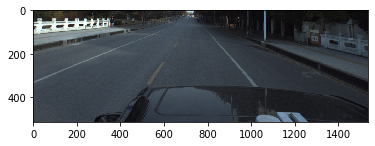

In [6]:
plt.imshow(img)

In [7]:
x = transforms(img).unsqueeze(0) # add batch dimension

In [8]:
x.shape, x.dtype

(torch.Size([1, 3, 512, 1536]), torch.float32)

In [ ]:
scripted_model = torch.jit.load('/home/ivb/ros_workspaces/vision_ws/src/itl-ros-vision/vision/segmentator-data/fcn_resnet18/traced_model_best_resnet18.pt')

In [1]:
y = scripted_model(x)

NameError: name 'scripted_model' is not defined

In [23]:
y.shape

torch.Size([1, 512, 1536])

In [36]:
y.dtype

torch.int64

In [30]:
palette = [0, 0, 0,
               70, 130, 180,
               220, 20, 60,
               128, 0, 128, 
               0, 0, 60, 
               0, 60, 100, 
               0, 0, 142, 
               119, 11, 32,  
               220, 220, 0,               
               102, 102, 156,
               128, 0, 0,
               128, 64, 128,            
               190, 153, 153,
               0, 0, 230, 
               128, 128, 0, 
               128, 78, 160,
               150, 100, 100,
               180, 165, 180, 
               107, 142, 35,
               201, 255, 229,
               0, 191, 255,          
               255, 128, 0, 
               0, 255, 255,
               178, 132, 190, 
               128, 128, 64, 
               102, 0, 204]
pred = np.asarray(y.cpu(), dtype=np.uint8)
save_img = Image.fromarray(pred[0])#batch_shape=1
save_img.putpalette(palette)

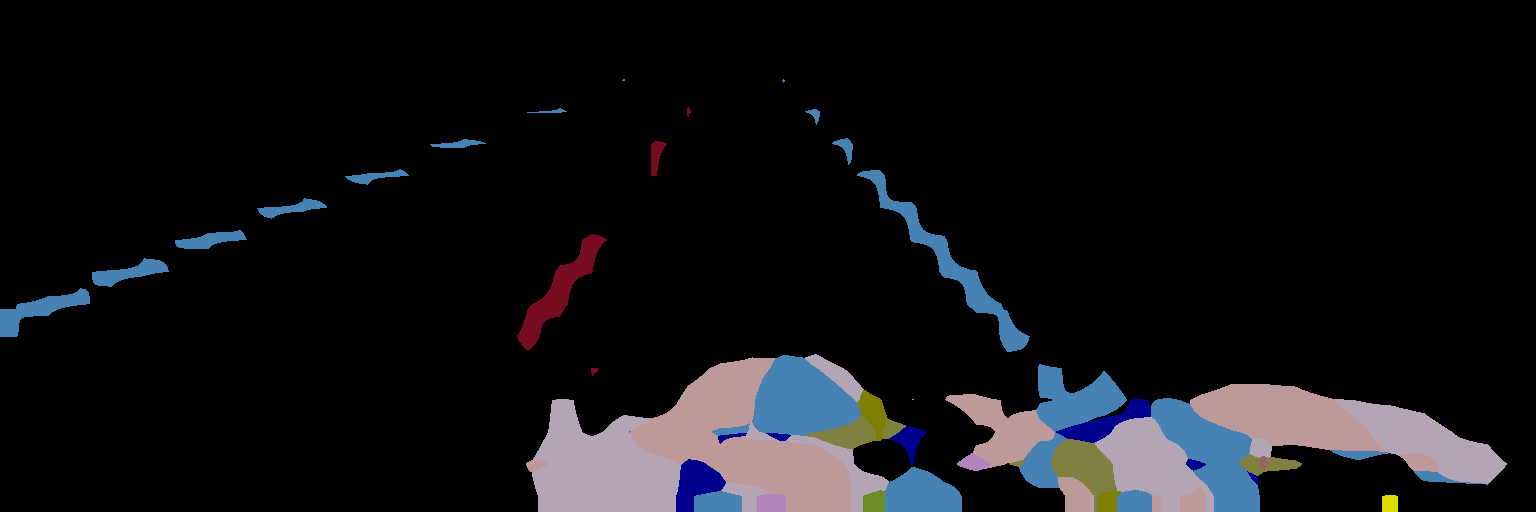

In [31]:
save_img

In [34]:
y

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]])